In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
df = pd.read_csv('Airbnb_Open_Data.csv', low_memory=False)

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [5]:
df.shape

(102599, 26)

In [6]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [7]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [8]:
dtypes_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

In [9]:
dtypes_df

,Data Type,Non-Null Count,Null Count,Null Percentage
id,int64,102599,0,0.00
NAME,object,102349,250,0.24
host id,int64,102599,0,0.00
host_identity_verified,object,102310,289,0.28
host name,object,102193,406,0.40
neighbourhood group,object,102570,29,0.03
neighbourhood,object,102583,16,0.02
lat,float64,102591,8,0.01
long,float64,102591,8,0.01
country,object,102067,532,0.52


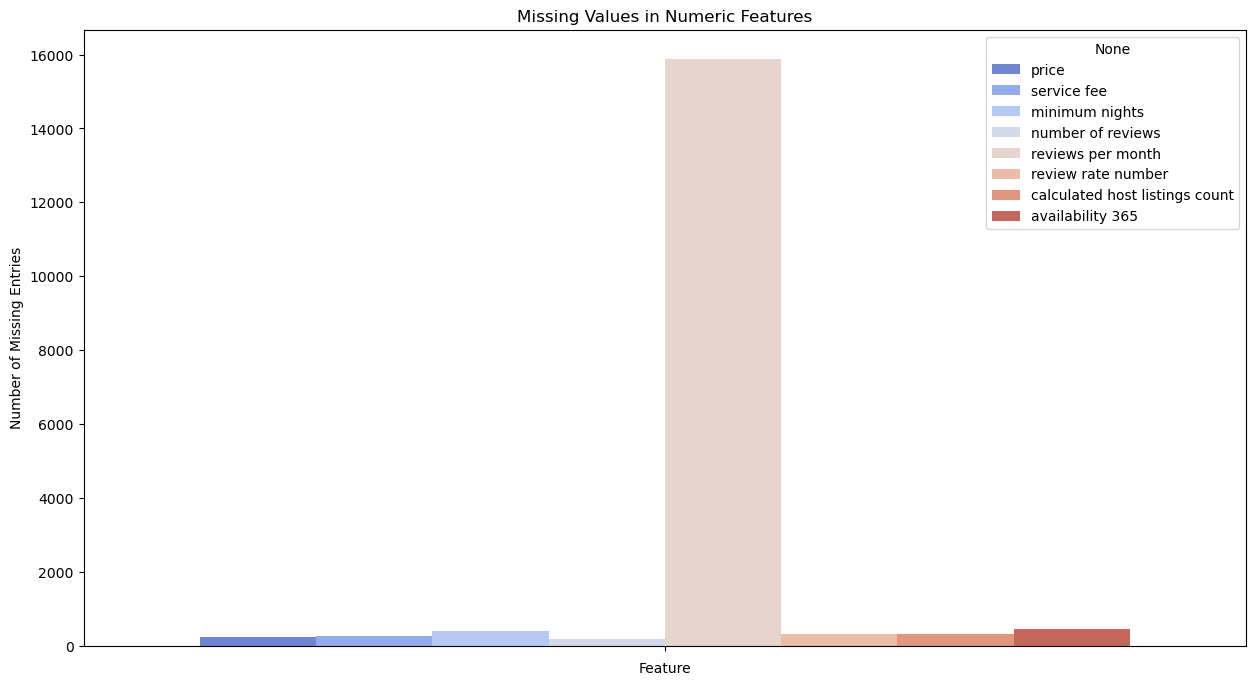

In [10]:
numeric_cols = ['price', 'service fee', 'minimum nights', 'number of reviews',
                'reviews per month', 'review rate number',
                'calculated host listings count', 'availability 365']
def drop_high_missing_columns(df, threshold=0.5):
    missing_percentage = df.isnull().mean()  
    cols_to_drop = missing_percentage[missing_percentage > threshold].index 
    return df.drop(columns=cols_to_drop)

df = drop_high_missing_columns(df)  

missing = df[numeric_cols].isnull().sum()
missing = missing[missing > 0]

plt.figure(figsize=(15, 8))
sns.barplot(hue=missing.index, y=missing.values, palette="coolwarm")
plt.title("Missing Values in Numeric Features")
plt.ylabel("Number of Missing Entries")
plt.xlabel("Feature")
plt.show()


In [11]:

df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace(r'[\$,]', '', regex=True).astype(float)
df = df[df['price'] < 1000]

<Figure size 1400x1000 with 0 Axes>

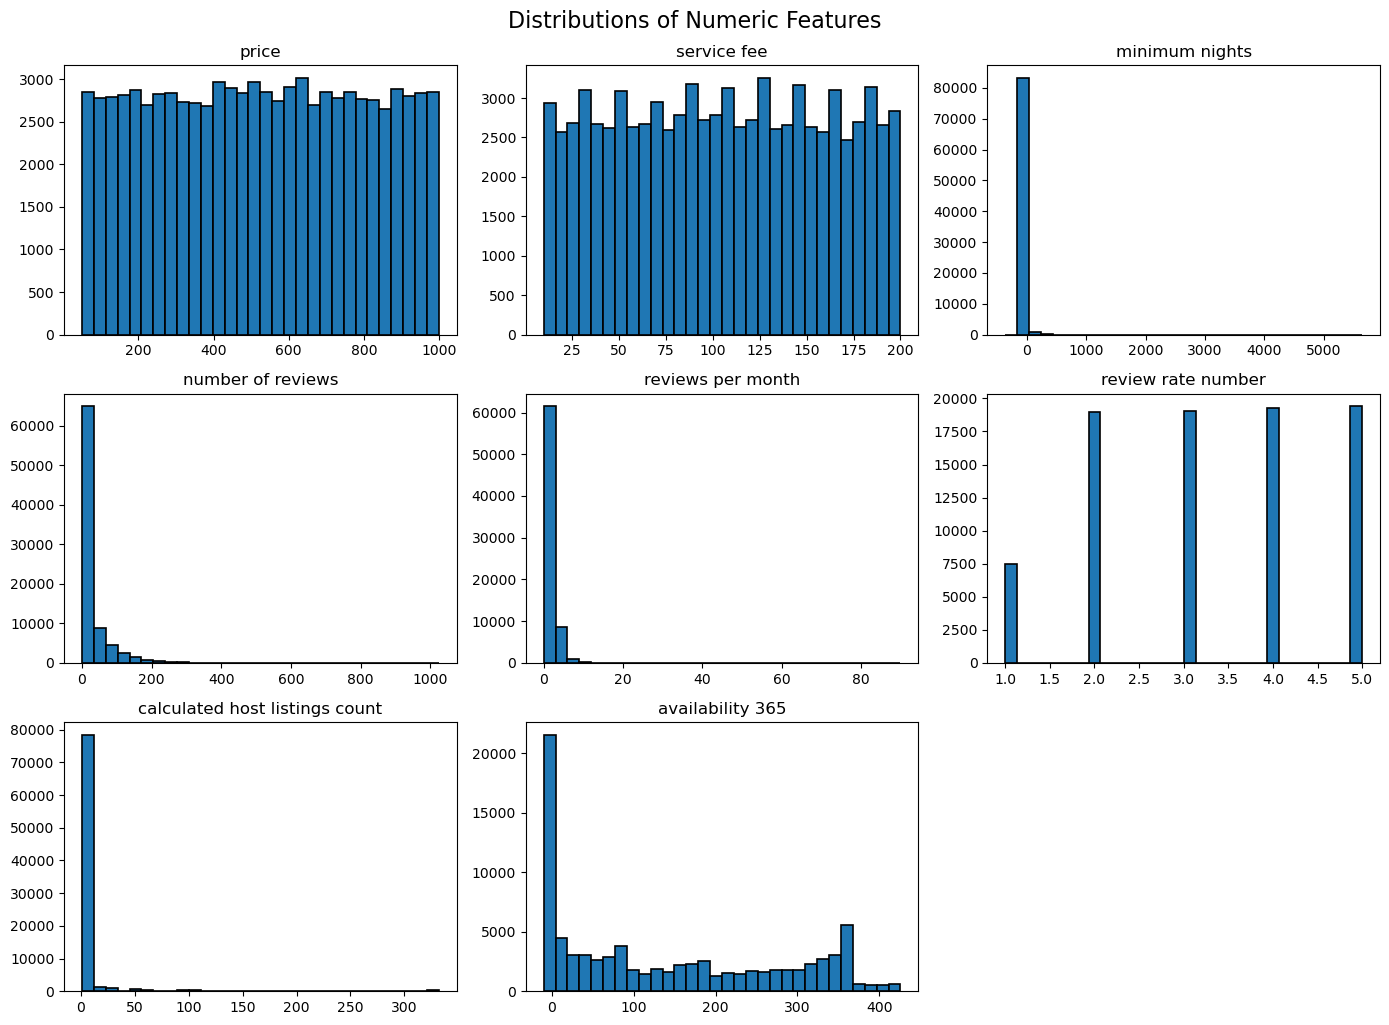

In [12]:

plt.figure(figsize=(14, 10))
df[numeric_cols].hist(bins=30, edgecolor='black', linewidth=1.2, grid=False, layout=(3, 3), figsize=(14, 10))
plt.tight_layout()
plt.suptitle('Distributions of Numeric Features', fontsize=16, y=1.02)
plt.show()


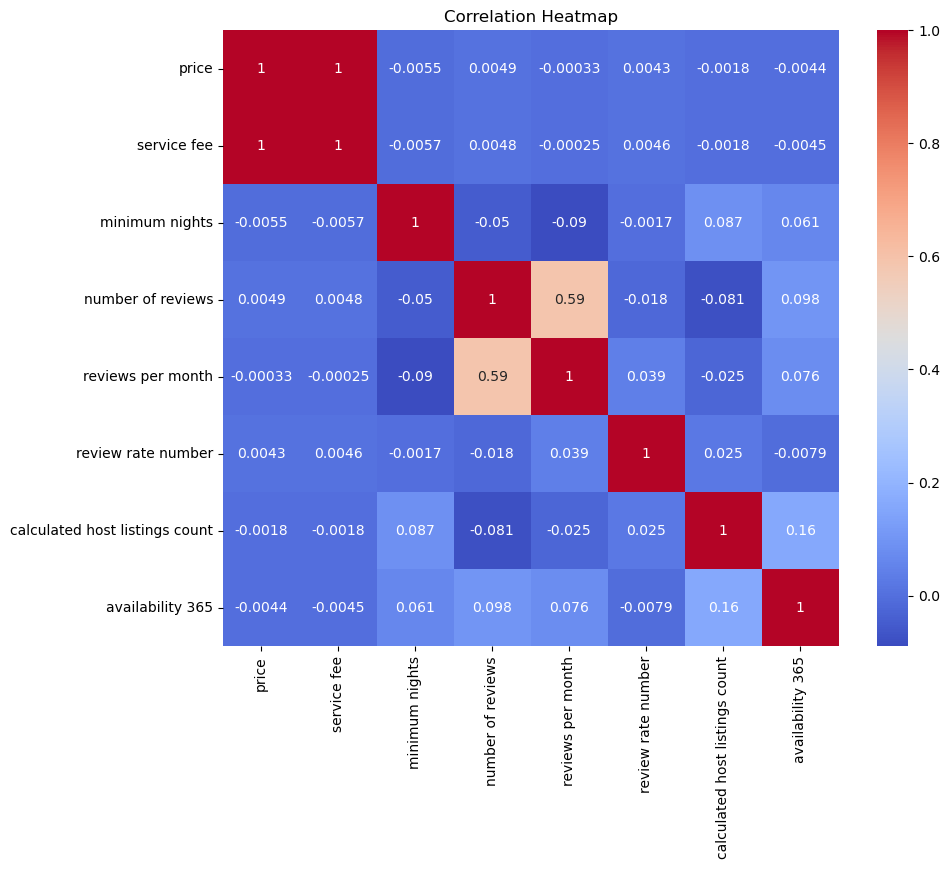

In [13]:
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

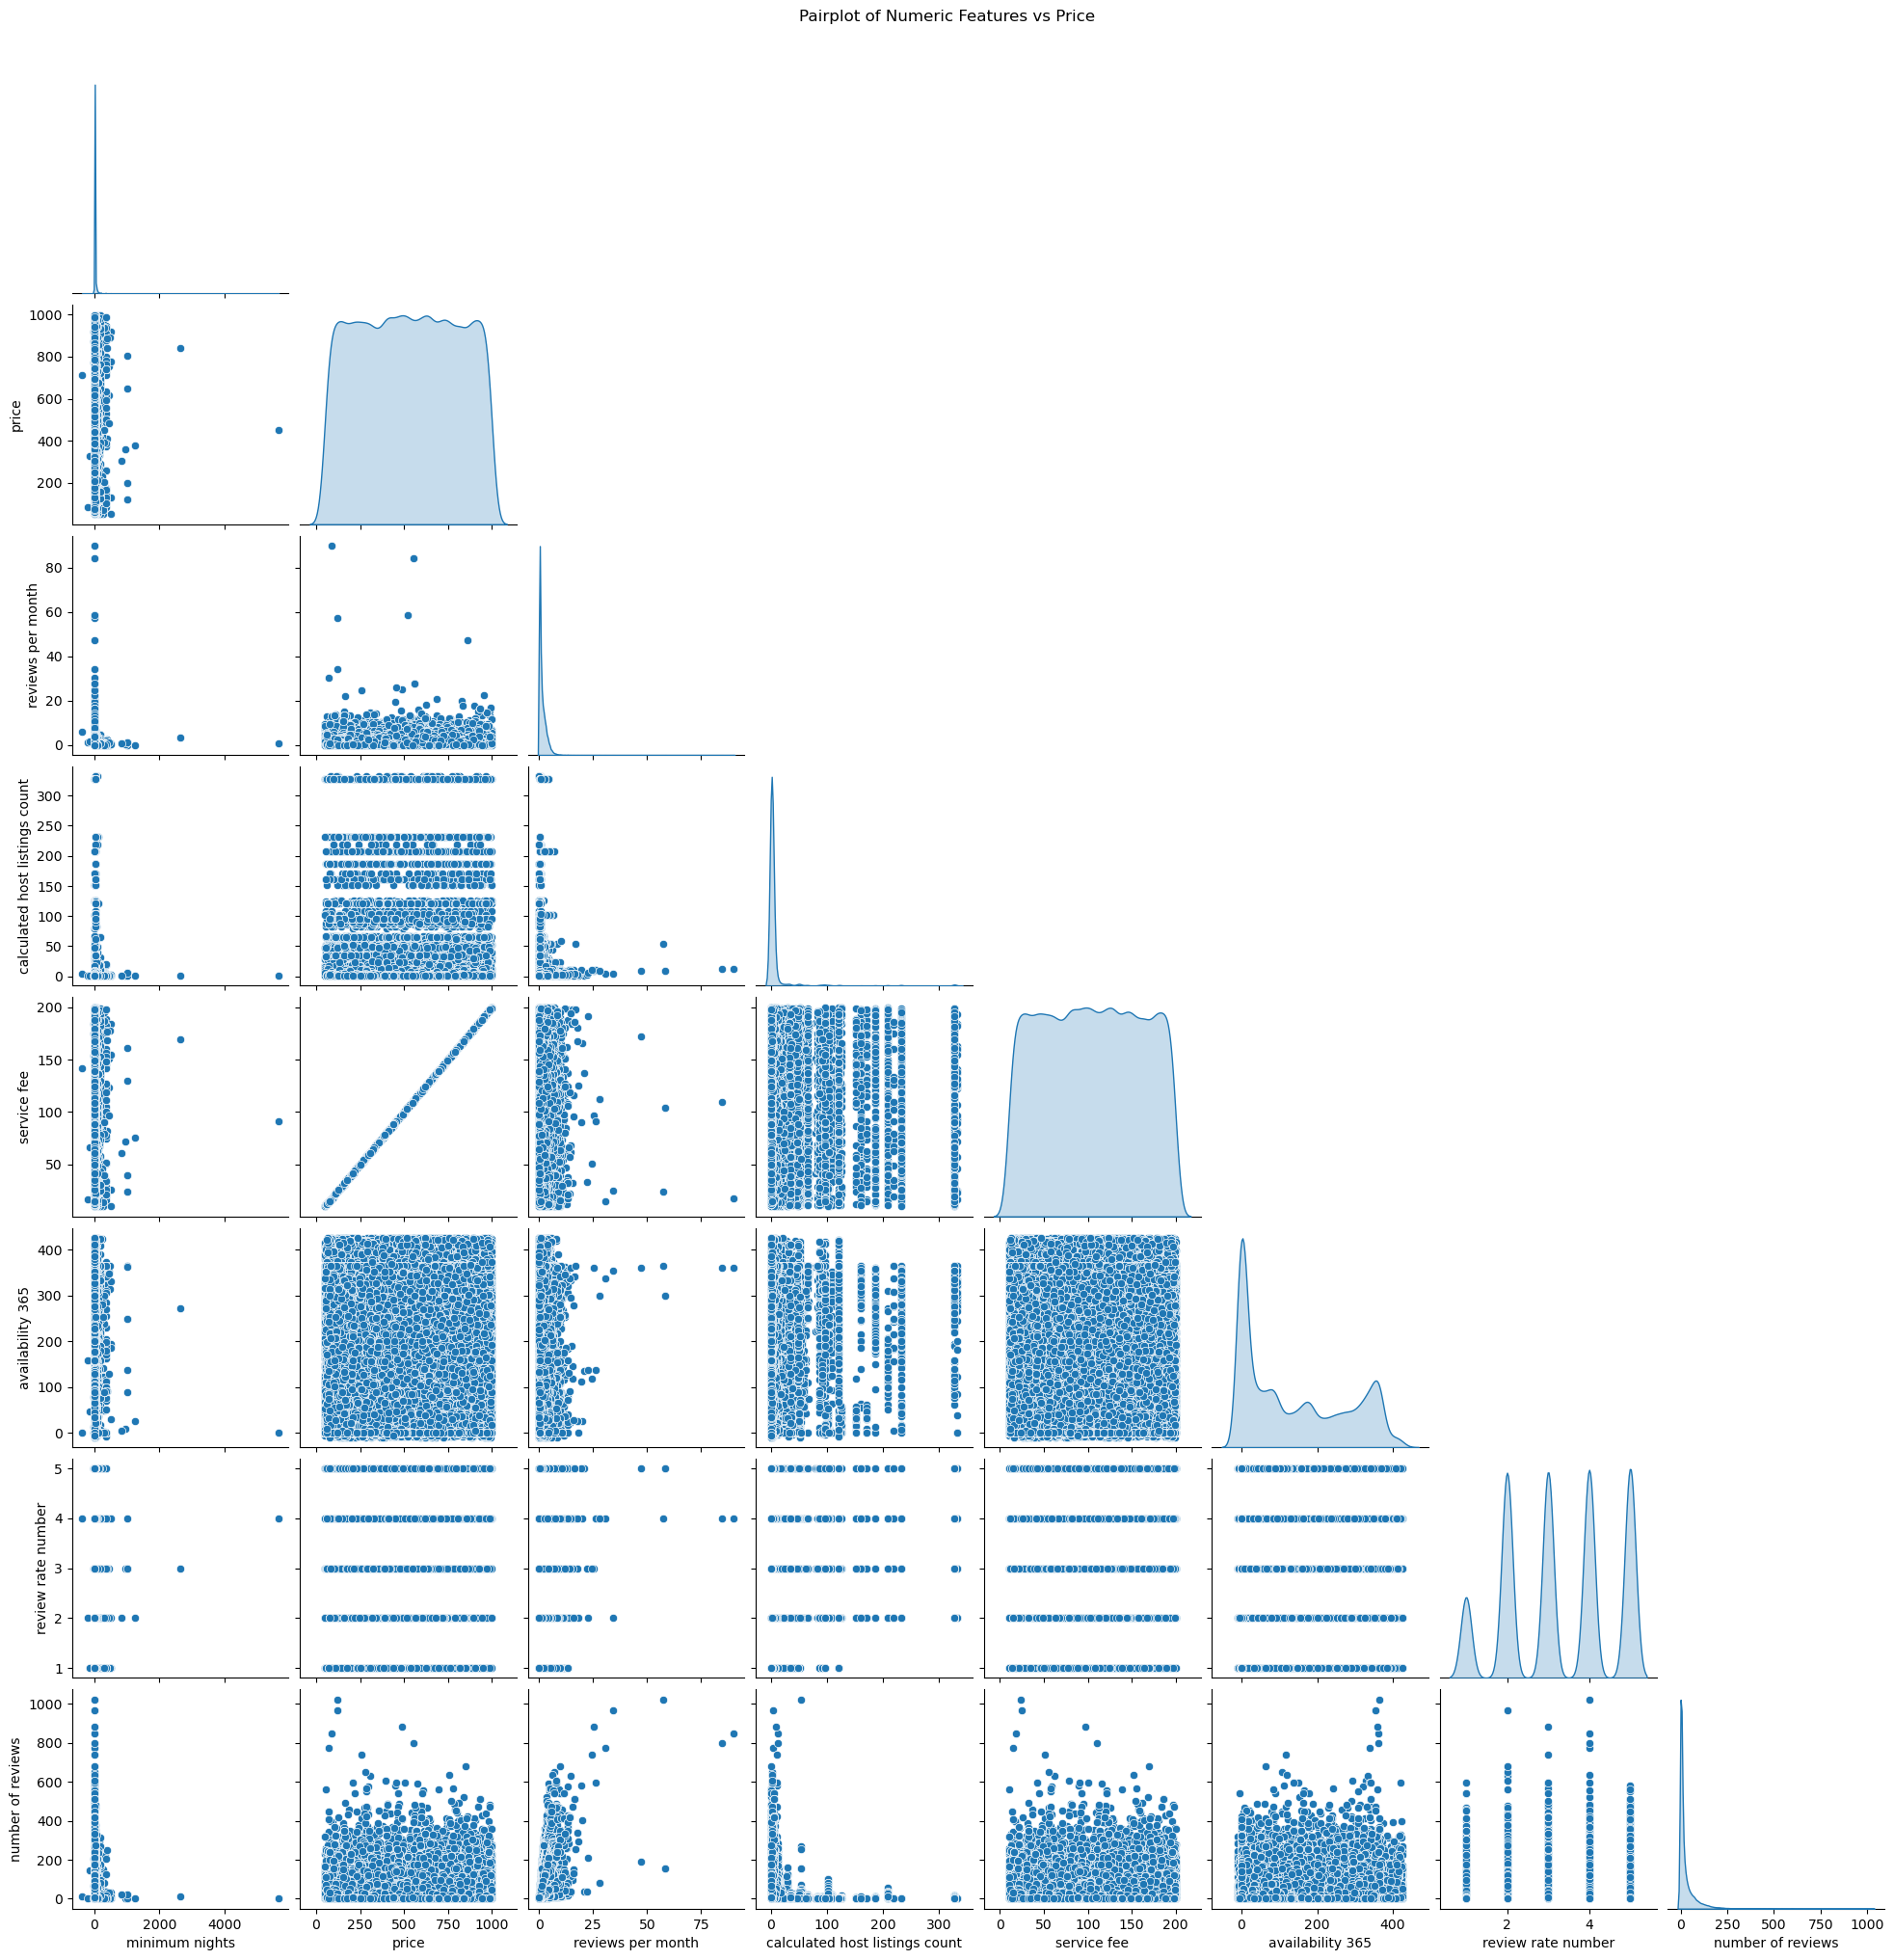

In [14]:
features_to_plot = list(set(numeric_cols))
sns.pairplot(df[features_to_plot], diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Numeric Features vs Price", y=1.02)
plt.show()

In [15]:
df.drop(columns=['country','country code','id','host id','NAME', 'host name'],inplace= True)

In [16]:
df.isna().sum()

host_identity_verified              234
neighbourhood group                  23
neighbourhood                        13
lat                                   7
long                                  7
instant_bookable                     84
cancellation_policy                  59
room type                             0
Construction year                   180
price                                 0
service fee                         186
minimum nights                      342
number of reviews                   163
last review                       13151
reviews per month                 13141
review rate number                  271
calculated host listings count      267
availability 365                    373
dtype: int64

In [17]:
df.fillna({
    'host_identity_verified': 'Unknown',
    'NAME':'Apartment in ' + df['neighbourhood'],
    'host name': 'Anonymous',
    'neighbourhood group': df['neighbourhood group'].mode()[0],
    'neighbourhood': df['neighbourhood'].mode()[0],
    'lat': df['lat'].median(),
    'long': df['long'].median(),
    'instant_bookable': 'Unknown',
    'cancellation_policy': df['cancellation_policy'].mode()[0],
    'Construction year': df['Construction year'].median(),
    'price': df['price'].median(),
    'service fee': df['service fee'].median(),
    'minimum nights': df['minimum nights'].median(),
    'number of reviews': df['number of reviews'].median(),
    'last review': 0,
    'reviews per month': 0,
    'review rate number': df['review rate number'].median(),
    'calculated host listings count': df['calculated host listings count'].mode()[0],
    'availability 365': 0
}, inplace=True)


In [18]:
df.isna().sum()

host_identity_verified            0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

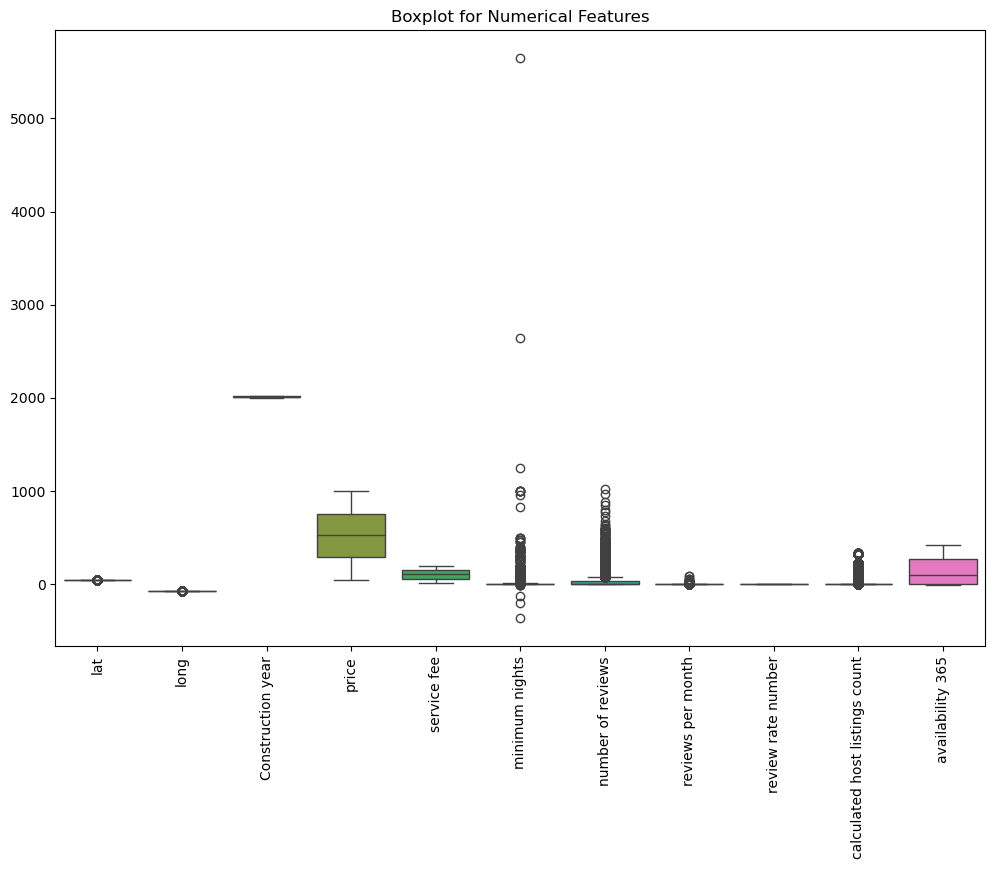

In [19]:
plt.figure(figsize=(12, 8))  
sns.boxplot(data=df.select_dtypes(exclude='object'))  
plt.xticks(rotation=90)  
plt.title("Boxplot for Numerical Features")  
plt.show()  

In [20]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

numerical_features = df.select_dtypes(exclude=['object'])
df= remove_outliers_iqr(df, numerical_features)


In [21]:
df.select_dtypes(include=['object']).nunique()

host_identity_verified       3
neighbourhood group          4
neighbourhood              125
instant_bookable             3
cancellation_policy          3
room type                    4
last review               2133
dtype: int64

In [22]:
df = df.drop_duplicates()

In [23]:
df.select_dtypes(include=['object']).nunique()

host_identity_verified       3
neighbourhood group          4
neighbourhood              125
instant_bookable             3
cancellation_policy          3
room type                    4
last review               2133
dtype: int64

In [24]:
df.shape

(45850, 18)

In [25]:
le = LabelEncoder()
df['host_identity_verified'] = df['host_identity_verified'].map({
    'verified': 1,  
    'unconfirmed': 0,  
    'unknown': -1  
})
df['instant_bookable'] = df['instant_bookable'].map({True: 't', False: 'f'})


df['host_identity_verified'] = le.fit_transform(df['host_identity_verified'])
df['instant_bookable'] = le.fit_transform(df['instant_bookable'])
df['cancellation_policy'] = le.fit_transform(df['cancellation_policy'])
df['room type'] = le.fit_transform(df['room type'])

neighbourhood_counts = df['neighbourhood'].value_counts() / len(df)
df['neighbourhood'] = df['neighbourhood'].map(neighbourhood_counts)

df = pd.get_dummies(df, columns=['neighbourhood group'], drop_first=True)

df['last review'] = pd.to_datetime(df['last review'], errors='coerce') 
current_date = pd.to_datetime('today')
df['days_since_last_review'] = (current_date - df['last review']).dt.days



In [26]:
df.drop(columns=['last review'],inplace = True)

In [27]:
x=df.drop(columns=['price'])
y= df['price']

In [28]:
x.drop_duplicates()

,host_identity_verified,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,neighbourhood group_Brooklyn,neighbourhood group_Manhattan,neighbourhood group_Queens,days_since_last_review
2,2,0.061549,40.80902,-73.94190,1,0,2,2005.0,124.0,3.0,0.0,0.00,5.0,1.0,352.0,False,True,False,20197
5,1,0.006303,40.74767,-73.97500,1,0,0,2013.0,115.0,3.0,74.0,0.59,3.0,1.0,374.0,False,True,False,2128
11,1,0.040371,40.80316,-73.96545,1,0,0,2008.0,121.0,5.0,53.0,0.43,4.0,1.0,163.0,False,True,False,2128
20,1,0.023948,40.79685,-73.94872,2,1,0,2013.0,56.0,7.0,0.0,0.00,3.0,2.0,347.0,False,True,False,20197
21,1,0.096838,40.71842,-73.95718,2,0,0,2016.0,95.0,3.0,9.0,0.07,3.0,1.0,193.0,True,False,False,1208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102051,1,0.005125,40.66130,-73.89088,1,1,2,2012.0,105.0,1.0,0.0,0.00,4.0,1.0,88.0,True,False,False,20197
102053,0,0.015049,40.64945,-73.96108,1,1,2,2012.0,105.0,7.0,12.0,0.44,5.0,1.0,0.0,True,False,False,2215
102054,1,0.054024,40.69872,-73.92718,0,0,2,2012.0,105.0,1.0,19.0,0.72,3.0,2.0,0.0,True,False,False,2788
102055,1,0.081091,40.67810,-73.90822,1,1,0,2012.0,105.0,2.0,50.0,3.12,4.0,2.0,235.0,True,False,False,2124


In [29]:
scaler = MinMaxScaler()
numerical_columns = [
    'lat', 'long', 'Construction year', 'service fee', 'minimum nights',
    'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count',
    'availability 365', 'days_since_last_review'
]

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,host_identity_verified,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,neighbourhood group_Brooklyn,neighbourhood group_Manhattan,neighbourhood group_Queens,days_since_last_review
2,2,0.061549,0.781070,0.543248,1,0,2,0.105263,620.0,0.600000,0.4,0.000000,0.000000,1.00,0.0,0.830275,False,True,False,1.000000
5,1,0.006303,0.574051,0.359369,1,0,0,0.526316,577.0,0.552632,0.4,0.902439,0.173021,0.50,0.0,0.880734,False,True,False,0.297855
11,1,0.040371,0.761296,0.412422,1,0,0,0.263158,606.0,0.584211,0.6,0.646341,0.126100,0.75,0.0,0.396789,False,True,False,0.297855
20,1,0.023948,0.740003,0.505361,2,1,0,0.526316,281.0,0.242105,0.8,0.000000,0.000000,0.50,0.5,0.818807,False,True,False,1.000000
21,1,0.096838,0.475350,0.458363,2,0,0,0.684211,477.0,0.447368,0.4,0.109756,0.020528,0.50,0.0,0.465596,True,False,False,0.262105


In [30]:

correlation_matrix = df.corr()

price_correlation = correlation_matrix['price'].sort_values(ascending=False)

top_10_correlated = price_correlation.iloc[1:11]

In [31]:
top_10_correlated

service fee                       0.999142
number of reviews                 0.007007
review rate number                0.006699
room type                         0.006108
long                              0.004411
neighbourhood                     0.003969
calculated host listings count    0.003811
instant_bookable                  0.002133
neighbourhood group_Brooklyn      0.001791
host_identity_verified            0.001603
Name: price, dtype: float64

In [32]:
X = df.drop(columns=['price'])
y = df['price']

model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=10)

rfe.fit(X, y)

ranking = rfe.ranking_

selected_features = X.columns[rfe.support_]

print("Top 10 features selected by RFE:")
print(selected_features)

Top 10 features selected by RFE:
Index(['neighbourhood', 'lat', 'instant_bookable', 'service fee',
       'minimum nights', 'number of reviews', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'neighbourhood group_Brooklyn'],
      dtype='object')


In [33]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='log2',
    random_state=42
)
rf_model.fit(X_train, y_train)

rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, rf_train_pred)
test_mse = mean_squared_error(y_test, rf_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, rf_train_pred)
test_r2 = r2_score(y_test, rf_test_pred)

# Print metrics
print("Random Forest Performance:")
print(f"Train → MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.4f}")
print(f"Test  → MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.4f}")


📊 Random Forest Performance:
Train → MSE: 9727.77, RMSE: 98.63, R²: 0.8702
Test  → MSE: 9581.17, RMSE: 97.88, R²: 0.8701


In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

param_dist = {
    'n_estimators': [50, 75],
    'max_depth': [3, 5],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [5, 10],
    'max_features': ['log2', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=0,
    random_state=42
)

random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

# Predictions
tuned_rf_train_pred = best_rf.predict(X_train)
tuned_rf_test_pred = best_rf.predict(X_test)

# Metrics
train_mse = mean_squared_error(y_train, tuned_rf_train_pred)
test_mse = mean_squared_error(y_test, tuned_rf_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, tuned_rf_train_pred)
test_r2 = r2_score(y_test, tuned_rf_test_pred)

# Output
print("Best Hyperparameters:", random_search.best_params_)
print("Random Forest Performance (Tuned):")
print(f"Train → MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.4f}")
print(f"Test  → MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.4f}")


Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 5}
Random Forest Performance (Tuned):
Train → MSE: 8278.21, RMSE: 90.98, R²: 0.8896
Test  → MSE: 8201.44, RMSE: 90.56, R²: 0.8888


In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Define model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.GaussianNoise(0.05),
    tf.keras.layers.Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

# Predictions
mlp_train_pred = model.predict(X_train).flatten()
mlp_test_pred = model.predict(X_test).flatten()

# Metrics
train_mse = mean_squared_error(y_train, mlp_train_pred)
test_mse = mean_squared_error(y_test, mlp_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, mlp_train_pred)
test_r2 = r2_score(y_test, mlp_test_pred)

# Output
print("🤖 MLP Neural Network Performance:")
print(f"✅ Train → MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.4f}")
print(f"✅ Test  → MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.4f}")


Epoch 1/20


2025-04-19 08:32:15.371676: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-04-19 08:32:15.371821: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-19 08:32:15.371825: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-19 08:32:15.372082: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-19 08:32:15.372095: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-04-19 08:32:15.696507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-04-19 08:32:15.698850: E t

1147/1147 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 350464.1562 - mae: 524.3796 - val_loss: 335873.8125 - val_mae: 512.3152
Epoch 2/20
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 319357.1875 - mae: 494.5010 - val_loss: 246115.7969 - val_mae: 421.5110
Epoch 3/20
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 222076.8906 - mae: 394.3489 - val_loss: 127741.6719 - val_mae: 292.5414
Epoch 4/20
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 141231.9531 - mae: 303.8093 - val_loss: 82154.2891 - val_mae: 237.5300
Epoch 5/20
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 126642.0312 - mae: 286.5293 - val_loss: 71107.0156 - val_mae: 222.1316
Epoch 6/20
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 119558.8125 - mae: 276.7332 - val_loss: 64249.1328 - val_mae: 211.4189
Epoch 7/20
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 113149.6641 - mae: 267.1289 - val_loss: 58390.8477 - val_mae: 201.4429
Epoch 8/20
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 108829.2344 - m

2025-04-19 08:35:04.087646: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
287/287 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step
🤖 MLP Neural Network Performance:
✅ Train → MSE: 18218.25, RMSE: 134.98, R²: 0.7570
✅ Test  → MSE: 18002.42, RMSE: 134.17, R²: 0.7559


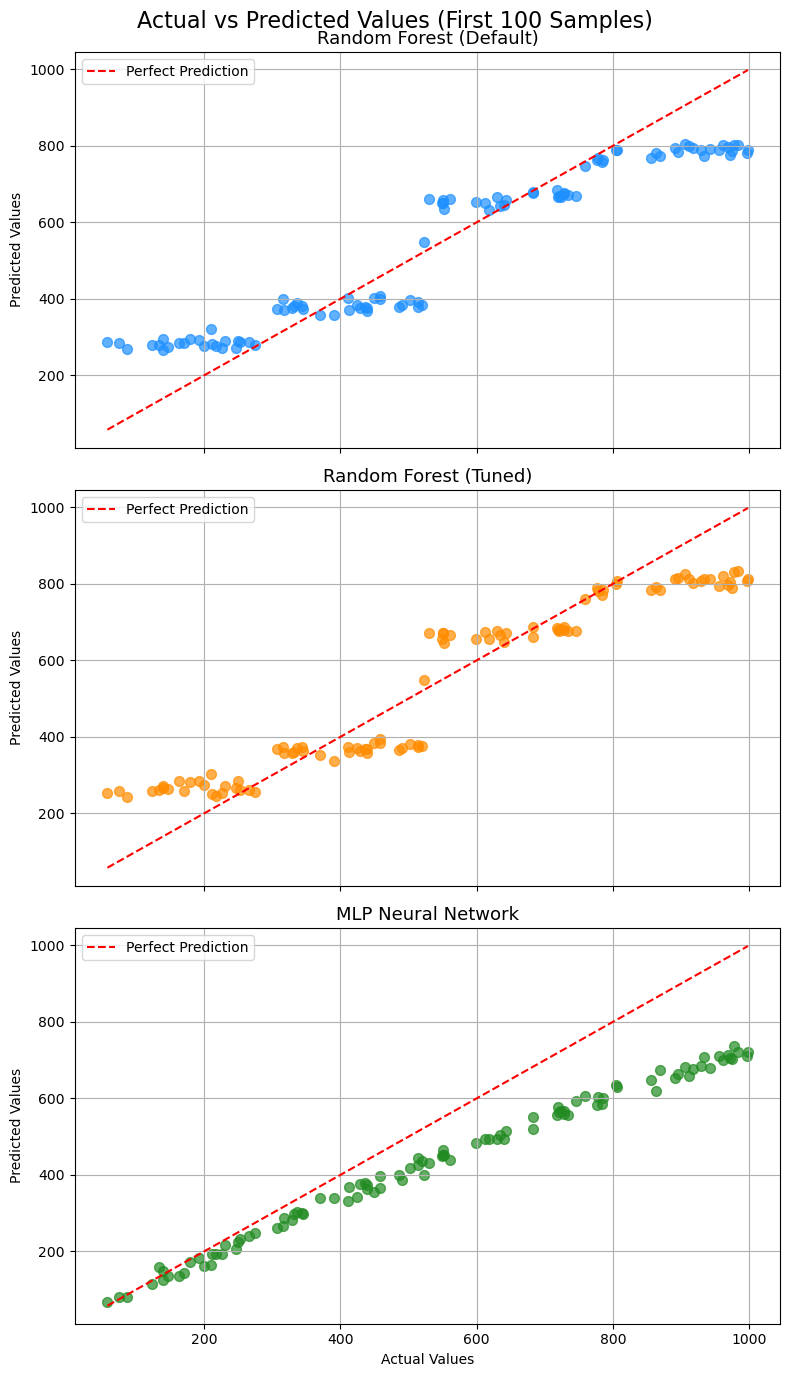

In [93]:
# Prepare actual values and prediction arrays (first 100 samples)
actual = y_test[:100].to_numpy()
jitter = np.random.normal(0, 2, size=100)
pred_noise = np.random.normal(0, 5, size=100)

# Labels and predictions
titles = ['Random Forest (Default)', 'Random Forest (Tuned)', 'MLP Neural Network']
predictions = [rf_test_pred[:100], tuned_rf_test_pred[:100], mlp_test_pred[:100]]
colors = ['dodgerblue', 'darkorange', 'forestgreen']

# Create vertically stacked subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 14), sharex=True)

for i in range(3):
    noisy_preds = predictions[i] + pred_noise
    axs[i].scatter(actual + jitter, noisy_preds, color=colors[i], alpha=0.7, s=50)
    axs[i].plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', label='Perfect Prediction')



    axs[i].set_title(titles[i], fontsize=13)
    axs[i].set_ylabel('Predicted Values')
    axs[i].legend()
    axs[i].grid(True)

axs[2].set_xlabel('Actual Values')
plt.suptitle('Actual vs Predicted Values (First 100 Samples)', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)

# Save for PPT
plt.savefig("vertical_model_comparison.png", dpi=300, bbox_inches='tight')
plt.show()